In [77]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [78]:
with open('result_gray_val.json', 'r') as f1, open('val_final.json', 'r') as f2:
    old = json.load(f1)
    new = json.load(f2)

In [79]:
def compare_keypoints(kp1, kp2):
    changes = []
    for i, (old_value, new_value) in enumerate(zip(kp1, kp2)):
        if old_value != new_value and new_value == 0.0 and old_value <=1.0:
            changes.append((i, old_value, new_value))
    return changes

In [80]:
changes_dict = {}

In [81]:
for item1 in old:
    for item2 in new:
        if item1['id'] == item2['id']:
            changes = compare_keypoints(item1['keypoints'], item2['keypoints'])
            if changes:
                changes_dict[item1['id']] = changes


In [82]:
for id, changes in changes_dict.items():
    print(f"id: {id}")
    for change in changes:
        index, old_value, new_value = change
        print(f"index: {index}, old_value: {old_value}, new_value: {new_value}")

id: 0
index: 20, old_value: 0.3255664110183716, new_value: 0
index: 26, old_value: 0.0600520521402359, new_value: 0
index: 38, old_value: 0.6759781241416931, new_value: 0
id: 6
index: 47, old_value: 0.14951935410499573, new_value: 0
index: 50, old_value: 0.18807478249073029, new_value: 0
id: 8
index: 26, old_value: 0.18615813553333282, new_value: 0
index: 32, old_value: 0.26278743147850037, new_value: 0
id: 16
index: 47, old_value: 0.08437906950712204, new_value: 0
index: 50, old_value: 0.10514702647924423, new_value: 0
id: 17
index: 41, old_value: 0.05451801046729088, new_value: 0
index: 44, old_value: 0.05474739521741867, new_value: 0
index: 47, old_value: 0.0016362915048375726, new_value: 0
index: 50, old_value: 0.0017993972869589925, new_value: 0
id: 18
index: 47, old_value: 0.1998177468776703, new_value: 0
index: 50, old_value: 0.454902708530426, new_value: 0
id: 19
index: 41, old_value: 0.05840218812227249, new_value: 0
index: 44, old_value: 0.059960849583148956, new_value: 0
ind

In [83]:
old_values = [change[1] for changes in changes_dict.values() for change in changes]

In [84]:
old_values_series = pd.Series(old_values)
old_values_series.describe()

count    1903.000000
mean        0.068970
std         0.156903
min         0.000050
25%         0.003349
50%         0.010818
75%         0.055673
max         0.998829
dtype: float64

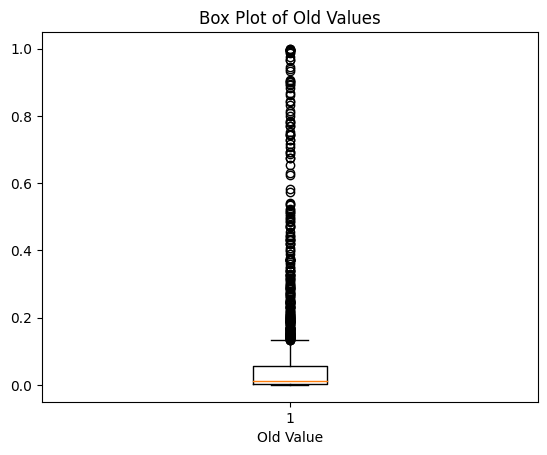

In [85]:
plt.figure()
plt.boxplot(old_values)  
plt.title('Box Plot of Old Values')
plt.xlabel('Old Value')
plt.show()

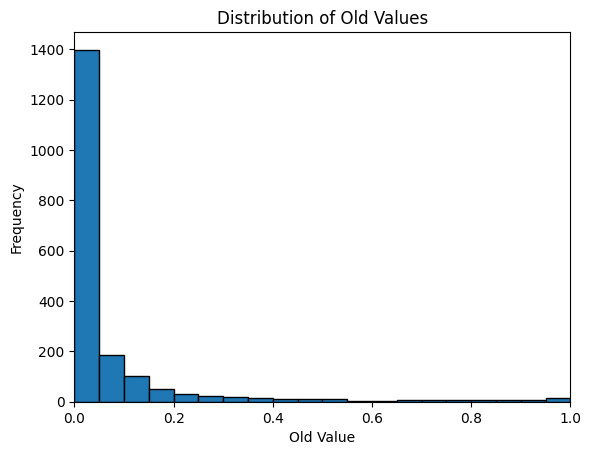

In [86]:
plt.hist(old_values, bins=20, edgecolor='black', range=(0, 1)) 
plt.title('Distribution of Old Values')
plt.xlabel('Old Value')
plt.ylabel('Frequency')
plt.xlim([0, 1]) 
plt.show()

In [87]:
def collect_remaining_data(kp1, kp2):
    remaining_data = []
    for i, (old_value, new_value) in enumerate(zip(kp1, kp2)):
        if new_value != 0.0 and old_value <= 1.0:
            remaining_data.append((i, old_value, new_value))
    return remaining_data

In [88]:
remaining_data_dict = {}

In [89]:
for item1 in old:
    for item2 in new:
        if item1['id'] == item2['id']:
            remaining_data = collect_remaining_data(item1['keypoints'], item2['keypoints'])
            if remaining_data:
                remaining_data_dict[item1['id']] = remaining_data

In [90]:
remaining_old_values = [change[1] for changes in remaining_data_dict.values() for change in changes]

In [91]:
remaining_old_values_series = pd.Series(remaining_old_values)
remaining_old_values_series.describe()

count    23045.000000
mean         0.767731
std          0.341916
min          0.000000
25%          0.680287
50%          0.964707
75%          0.992330
max          0.999886
dtype: float64

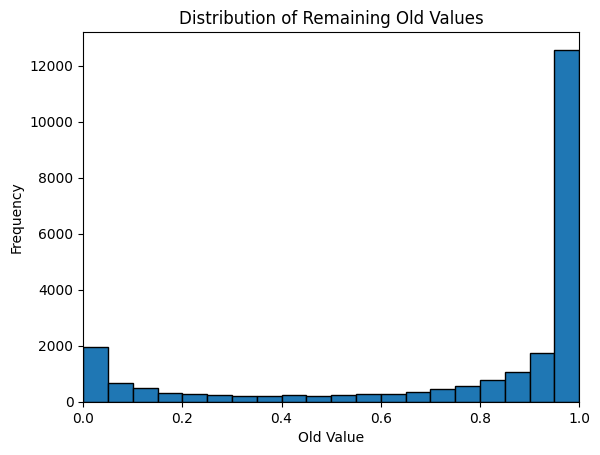

In [92]:
plt.hist(remaining_old_values, bins=20, edgecolor='black', range=(0, 1)) 
plt.title('Distribution of Remaining Old Values')
plt.xlabel('Old Value')
plt.ylabel('Frequency')
plt.xlim([0, 1]) 
plt.show()

In [93]:
total_remaining_values = len(remaining_old_values_series)

In [94]:
for i in range(90, 101):
    percentile_value = old_values_series.quantile(i / 100)
    print(f"The {i}th percentile value is: {percentile_value}")

The 90th percentile value is: 0.1690054714679718
The 91th percentile value is: 0.19360336065292363
The 92th percentile value is: 0.21868573606014294
The 93th percentile value is: 0.25239353418350247
The 94th percentile value is: 0.2963417589664458
The 95th percentile value is: 0.3573871791362753
The 96th percentile value is: 0.43184853911399806
The 97th percentile value is: 0.52152379155159
The 98th percentile value is: 0.7435050010681152
The 99th percentile value is: 0.899948445558548
The 100th percentile value is: 0.9988287091255188


In [95]:
percentiles = []
percentile_values = []
percentages_below = []

for i in range(80, 101):
    percentile_value = old_values_series.quantile(i / 100)
    count_below_percentile = (remaining_old_values_series <= percentile_value).sum()
    percentage_below_percentile = (count_below_percentile / total_remaining_values) * 100
    percentiles.append(f"{i}th")
    percentile_values.append(f"{percentile_value:.2f}")
    percentages_below.append(f"{percentage_below_percentile:.2f}%")

In [96]:
table_data = {
    'Percentile': percentiles,
    'Percentile Value from old_values_series': percentile_values,
    'Percentage of values in remaining_old_values_series below this value': percentages_below
}

table_df = pd.DataFrame(table_data)

In [97]:
table_df

,Percentile,Percentile Value from old_values_series,Percentage of values in remaining_old_values_series below this value
0,80th,0.08,10.08%
1,81th,0.08,10.33%
2,82th,0.09,10.62%
3,83th,0.10,11.07%
4,84th,0.10,11.41%
5,85th,0.11,11.78%
6,86th,0.12,12.13%
7,87th,0.13,12.60%
8,88th,0.14,13.07%
9,89th,0.15,13.49%
